# Lecture 5
# Machine Learning Basics



Too many training epochs can cause overfitting

Noisy data can also cause overfitting

Ambiguous features can cause overfitting
  * “Noise” may be due to inherent ambiguity rather than by mistake (e.g., prediction of raining using atmospheric features)

In [8]:
from tensorflow.keras.datasets import mnist 
import numpy as np
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255

#Bogus information
train_images_with_noise_channels = np.concatenate(
[train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate( [train_images, np.zeros((len(train_images), 784))], axis=1)
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
def get_model():
    model = keras.Sequential([layers.Dense(512, activation="relu"),layers.Dense(10, activation="softmax")]) 
    model.compile(optimizer="rmsprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
train_images_with_noise_channels, train_labels, epochs=10,
batch_size=128,
validation_split=0.2)
              
model = get_model()
history_zeros = model.fit(
train_images_with_zeros_channels, train_labels, epochs=10,
batch_size=128,
validation_split=0.2)

2022-03-10 11:21:11.343438: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-10 11:21:11.520197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.6137 - accuracy: 0.8150

2022-03-10 11:21:14.208272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 8ms/step - loss: 0.6137 - accuracy: 0.8150 - val_loss: 0.2847 - val_accuracy: 0.9081
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2476 - accuracy: 0.9234 - val_loss: 0.2205 - val_accuracy: 0.9286
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1583 - accuracy: 0.9506 - val_loss: 0.1488 - val_accuracy: 0.9550
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1113 - accuracy: 0.9656 - val_loss: 0.1290 - val_accuracy: 0.9606
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0820 - accuracy: 0.9727 - val_loss: 0.1390 - val_accuracy: 0.9613
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0606 - accuracy: 0.9808 - val_loss: 0.1326 - val_accuracy: 0.9625
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0449 - accuracy: 0.9853 - val_loss: 0.1370 - val_accuracy: 0.9629
Epoch 8/10
375/37

2022-03-10 11:21:36.076939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


371/375 [============================>.] - ETA: 0s - loss: 0.2886 - accuracy: 0.9154

2022-03-10 11:21:38.393027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 7ms/step - loss: 0.2873 - accuracy: 0.9156 - val_loss: 0.1410 - val_accuracy: 0.9604
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1181 - accuracy: 0.9656 - val_loss: 0.1024 - val_accuracy: 0.9692
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0782 - accuracy: 0.9762 - val_loss: 0.1091 - val_accuracy: 0.9682
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0565 - accuracy: 0.9834 - val_loss: 0.0849 - val_accuracy: 0.9755
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0426 - accuracy: 0.9873 - val_loss: 0.0824 - val_accuracy: 0.9770
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0318 - accuracy: 0.9909 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0243 - accuracy: 0.9933 - val_loss: 0.0804 - val_accuracy: 0.9792
Epoch 8/10
375/37

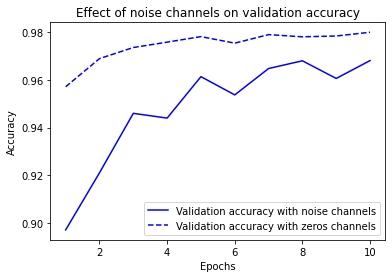

In [10]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"] 
epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-",label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",label="Validation accuracy with zeros channels") 
plt.title("Effect of noise channels on validation accuracy") 
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

“Feature selection” required to discard noisy features before training

## The nature of generalization in deep learning
* How well can a deep learning model fit noisy data?
* Try fitting a MNIST model with randomly shuffled labels

In [5]:
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
random_train_labels = train_labels[:] 
np.random.shuffle(random_train_labels)

model = keras.Sequential([ layers.Dense(512, activation="relu"),
                          layers.Dense(10, activation="softmax") ]) 

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

NameError: name 'mnist' is not defined

In [12]:
model.fit(train_images, random_train_labels, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
 11/375 [..............................] - ETA: 1s - loss: 2.3920 - accuracy: 0.1236  

2022-03-08 11:20:31.908468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - ETA: 0s - loss: 2.3163 - accuracy: 0.1063

2022-03-08 11:20:33.806218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 6ms/step - loss: 2.3163 - accuracy: 0.1063 - val_loss: 2.3065 - val_accuracy: 0.1027
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3011 - accuracy: 0.1162 - val_loss: 2.3126 - val_accuracy: 0.1001
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2921 - accuracy: 0.1251 - val_loss: 2.3217 - val_accuracy: 0.1022
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2795 - accuracy: 0.1378 - val_loss: 2.3220 - val_accuracy: 0.1018
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2613 - accuracy: 0.1519 - val_loss: 2.3367 - val_accuracy: 0.1000
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 2.2401 - accuracy: 0.1679 - val_loss: 2.3562 - val_accuracy: 0.0975
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2146 - accuracy: 0.1827 - val_loss: 2.3731 - val_accuracy: 0.0987
Epoch 8/100

375/375 [==============================] - 2s 5ms/step - loss: 0.9130 - accuracy: 0.6965 - val_loss: 4.7124 - val_accuracy: 0.0950
Epoch 59/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8970 - accuracy: 0.7046 - val_loss: 4.7730 - val_accuracy: 0.0981
Epoch 60/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8845 - accuracy: 0.7082 - val_loss: 4.8132 - val_accuracy: 0.0972
Epoch 61/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8700 - accuracy: 0.7134 - val_loss: 4.8874 - val_accuracy: 0.0988
Epoch 62/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8573 - accuracy: 0.7168 - val_loss: 4.9545 - val_accuracy: 0.0959
Epoch 63/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8448 - accuracy: 0.7224 - val_loss: 4.9828 - val_accuracy: 0.0943
Epoch 64/100
375/375 [==============================] - 2s 5ms/step - loss: 0.8289 - accuracy: 0.7268 - val_loss: 5.0708 - val_accuracy: 0.0960
Epoch

Deep learning models can be trained to fit almost anything given enough representation power.

* Nature of generalization
    * has little to do with deep learning models themselves
    * has much to do with the structure of information in the real world
* MNIST example
    * Total # of 28 x 28 uint8 images in a 784-dim space can be huge (256784), more than # of atoms in universe
    * MNIST data (50K) occupy a tiny subspace
    * Furthermore, MNIST data lie closely on a continuous manifold
    
* The manifold hypothesis of ML
    * Machine learning models only have to fit relatively simple, low-dimensional, highly structured subspaces (=manifolds)
    * Within one manifold, it’s always possible to interpolate between two inputs

## Evaluating machine learning models
* Training, validation, and test sets
    * Training set to tune the parameters of the model (e.g., SGD on the loss)
    * Validation set to tune the hyperparameters (e.g., learning rates) and select models (3 layer vs 5 layer model)
    * Test set to evaluate the final performance of the model
* Beating a common-sense baseline
* Things to keep in mind about model evaluation

## Improving model fit
Three common problems you’ll encounter
* Training doesn’t get started: your training loss doesn’t go down over time
* Training gets started just fine, but your model doesn’t meaningfully generalize: you can’t beat the common-sense baseline
* Training and validation loss both go down over time, and you can beat your baseline, but you cannot overfit

Training doesn’t get started: your training loss doesn’t go
down over time
* Remember, even a relatively small model can be trained to fit pure noise (like randomly-shuffled labels)
* The model does so by “memorizing the data” if necessary
* As long as the model is not too small, this is the issue of **failed optimization**

Optimization can fail due to wrong choices:
* Optimizer type
* Distribution of initial weights
* Learning rate
* Batch size

Use learning rate `1.0`, and observe it bad.

In [16]:
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255
model = keras.Sequential([ layers.Dense(512, activation="relu"), 
                          layers.Dense(10, activation="softmax")
                         ]) 
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) 
model.fit(train_images, train_labels,
epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
 10/375 [..............................] - ETA: 2s - loss: 25001.6113 - accuracy: 0.3102

2022-03-08 11:53:01.015269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


367/375 [============================>.] - ETA: 0s - loss: 714.0737 - accuracy: 0.4108

2022-03-08 11:53:02.962060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 6ms/step - loss: 698.8919 - accuracy: 0.4080 - val_loss: 3.6489 - val_accuracy: 0.2857
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 4.0329 - accuracy: 0.2907 - val_loss: 5.3202 - val_accuracy: 0.3486
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 3.2991 - accuracy: 0.2907 - val_loss: 2.2428 - val_accuracy: 0.3102
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 2.7078 - accuracy: 0.2625 - val_loss: 2.1334 - val_accuracy: 0.2528
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6288 - accuracy: 0.2532 - val_loss: 2.2216 - val_accuracy: 0.2175
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4445 - accuracy: 0.2376 - val_loss: 3.1241 - val_accuracy: 0.2657
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.3092 - accuracy: 0.2432 - val_loss: 2.5704 - val_accuracy: 0.2256
Epoch 8/10
375/

Use a learning rate of `0.01`

In [19]:
model = keras.Sequential([ layers.Dense(512, activation="relu"), 
                          layers.Dense(10, activation="softmax")
                         ]) 
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) 
model.fit(train_images, train_labels,
epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
  8/375 [..............................] - ETA: 2s - loss: 1.4718 - accuracy: 0.5723  

2022-03-08 11:57:40.715514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


368/375 [============================>.] - ETA: 0s - loss: 0.2922 - accuracy: 0.9158

2022-03-08 11:57:42.724783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 6ms/step - loss: 0.2891 - accuracy: 0.9166 - val_loss: 0.1439 - val_accuracy: 0.9580
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1181 - accuracy: 0.9651 - val_loss: 0.1164 - val_accuracy: 0.9654
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9772 - val_loss: 0.0898 - val_accuracy: 0.9735
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0554 - accuracy: 0.9834 - val_loss: 0.0840 - val_accuracy: 0.9750
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0412 - accuracy: 0.9879 - val_loss: 0.0875 - val_accuracy: 0.9747
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0313 - accuracy: 0.9904 - val_loss: 0.0782 - val_accuracy: 0.9778
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0233 - accuracy: 0.9933 - val_loss: 0.0845 - val_accuracy: 0.9781
Epoch 8/10
375/37

Training gets started just fine, but your model doesn’t meaningfully generalize
* You can’t beat the common-sense baseline
*  Something is **fundamentally wrong**

Possible causes:

* Input data simply doesn’t contain sufficient information to predict your targets: the problem is not solvable (e.g., MNIST with shuffled labels)
* Model you’re using is not suited for the problem at hand. The best architectures to use can be different for data modalities—images, text, timeseries, and so on

If you manage to have validation metrics are going down, we are almost there. We need to start increasing the model capacity.


**Example:** Try fitting a simple zero-hidden layer model (called logistic regression) on MNIST

In [20]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) 

history_small_model = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20


2022-03-08 12:04:43.320249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


362/375 [===========================>..] - ETA: 0s - loss: 0.6779 - accuracy: 0.8342

2022-03-08 12:04:45.148409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 5ms/step - loss: 0.6669 - accuracy: 0.8367 - val_loss: 0.3613 - val_accuracy: 0.9002
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3514 - accuracy: 0.9041 - val_loss: 0.3088 - val_accuracy: 0.9159
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3158 - accuracy: 0.9116 - val_loss: 0.2908 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2997 - accuracy: 0.9159 - val_loss: 0.2805 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2896 - accuracy: 0.9186 - val_loss: 0.2770 - val_accuracy: 0.9217
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2831 - accuracy: 0.9207 - val_loss: 0.2721 - val_accuracy: 0.9261
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2781 - accuracy: 0.9217 - val_loss: 0.2701 - val_accuracy: 0.9263
Epoch 8/20
375/37

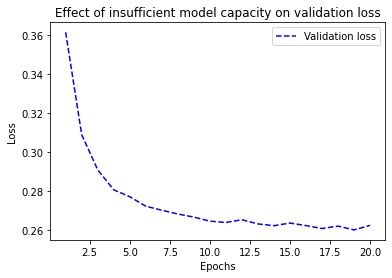

In [22]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--",label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Try a bigger model

Epoch 1/20


2022-03-08 12:13:04.581746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


367/375 [============================>.] - ETA: 0s - loss: 0.3659 - accuracy: 0.8994

2022-03-08 12:13:06.949603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 3s 6ms/step - loss: 0.3629 - accuracy: 0.9002 - val_loss: 0.1957 - val_accuracy: 0.9439
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1629 - accuracy: 0.9516 - val_loss: 0.1435 - val_accuracy: 0.9565
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1166 - accuracy: 0.9658 - val_loss: 0.1172 - val_accuracy: 0.9657
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0893 - accuracy: 0.9740 - val_loss: 0.1179 - val_accuracy: 0.9660
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0726 - accuracy: 0.9786 - val_loss: 0.0961 - val_accuracy: 0.9722
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9819 - val_loss: 0.0935 - val_accuracy: 0.9719
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0489 - accuracy: 0.9853 - val_loss: 0.1076 - val_accuracy: 0.9692
Epoch 8/20
375/37

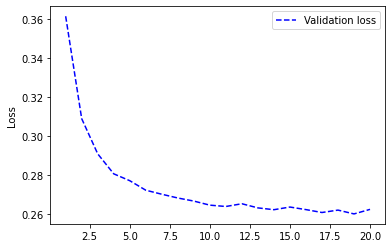

In [23]:
model = keras.Sequential([ layers.Dense(96, activation="relu"),
                          layers.Dense(96, activation="relu"), 
                          layers.Dense(10, activation="softmax"),
                         ]) 
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) 
history_large_model = model.fit( train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2)

#import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss") #plt.title("Effect of insufficient model capacity on validation loss") plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Improving generalization**
* Dataset curation
* Feature engineering
* Using early stopping
* Regularizing your model

In deep learning, we always use models that are vastly 
overparameterized

You will always interrupt training long before you’ve reached the 
minimum possible training loss
*  Previously, we’ve done it manually
*  We can use an EarlyStopping callback in Keras, which will interrupt 
training as soon as validation metrics stop improving (Lecture 7)

Regularization by reducing the network size 
* Original vs lower capacity vs higher capacity

Weight regularization: $min_w loss(w) + \lambda \|w\|^2 2$
* Adding L2 weight regularization to the model

In [10]:
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),activation="relu"),
                          layers.Dense(16, kernel_regularizer=regularizers.l2(0.002),activation="relu"),
                          layers.Dense(1, activation="sigmoid")
                         ])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(train_images, train_labels,epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-03-10 11:22:06.136671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


70/71 [============================>.] - ETA: 0s - loss: -45.9566 - accuracy: 0.1133

2022-03-10 11:22:07.094207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


71/71 [==============================] - 1s 11ms/step - loss: -46.3429 - accuracy: 0.1131 - val_loss: -119.2476 - val_accuracy: 0.1095
Epoch 2/20
71/71 [==============================] - 1s 10ms/step - loss: -245.6793 - accuracy: 0.1143 - val_loss: -412.3319 - val_accuracy: 0.1095
Epoch 3/20
71/71 [==============================] - 1s 11ms/step - loss: -658.3376 - accuracy: 0.1143 - val_loss: -953.1919 - val_accuracy: 0.1095
Epoch 4/20
71/71 [==============================] - 1s 9ms/step - loss: -1350.9567 - accuracy: 0.1143 - val_loss: -1804.2240 - val_accuracy: 0.1095
Epoch 5/20
71/71 [==============================] - 1s 9ms/step - loss: -2382.2969 - accuracy: 0.1143 - val_loss: -3023.9465 - val_accuracy: 0.1095
Epoch 6/20
71/71 [==============================] - 1s 11ms/step - loss: -3817.5710 - accuracy: 0.1143 - val_loss: -4674.0317 - val_accuracy: 0.1095
Epoch 7/20
71/71 [==============================] - 1s 10ms/step - loss: -5716.1782 - accuracy: 0.1143 - val_loss: -6808.1240 

Alternative Method of Regularization

In [11]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

Adding dropout
* During training (not testing), drop the outputs of randomly chosen nodes, changing at each forward propagation
* known to make the cost function more convex (i.e., easier to minimize) and reduce dependence on few nodes

**Practice**

Adding dropout to the IMDB model

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import imdb

(train_data,train_labels), (test_data,test_labels)= imdb.load_data(num_words=10000)

# Convert imdb review data to vectorized sequence
# each dimension corresponds to a word in the dictionary 
# the value is words frequencey
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] += 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [16]:
model = keras.Sequential([layers.Dense(16, activation="relu"),
                          layers.Dropout(0.5), ## New layer after Dense
                          layers.Dense(16, activation="relu"),
                          layers.Dropout(0.5), ## New layer after Dense
                          layers.Dense(1, activation="sigmoid")
                         ])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(x_train, y_train,epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20


2022-03-10 11:27:38.110999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 35ms/step - loss: 0.6655 - accuracy: 0.5961 - val_loss: 0.5477 - val_accuracy: 0.8140


2022-03-10 11:27:39.264655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.5532 - accuracy: 0.7379 - val_loss: 0.4599 - val_accuracy: 0.8272
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4673 - accuracy: 0.8056 - val_loss: 0.3592 - val_accuracy: 0.8750
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4040 - accuracy: 0.8458 - val_loss: 0.3258 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3518 - accuracy: 0.8713 - val_loss: 0.3090 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3084 - accuracy: 0.8918 - val_loss: 0.2885 - val_accuracy: 0.8918
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2785 - accuracy: 0.9003 - val_loss: 0.2799 - val_accuracy: 0.8925
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2496 - accuracy: 0.9148 - val_loss: 0.2915 - val_accuracy: 0.8943
Epoch 9/20
30

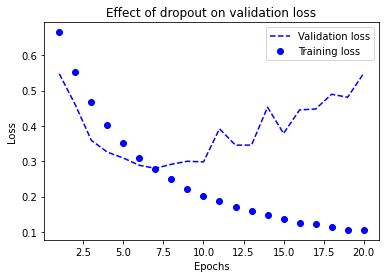

In [22]:
import matplotlib.pyplot as plt
val_loss = history_dropout.history["val_loss"]
train_loss= history_dropout.history["loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation loss") 
plt.plot(epochs, train_loss, "bo", label="Training loss") 
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [31]:
len(model.get_weights())
model.get_weights()

[array([[ 0.00396975, -0.01668397, -0.02113782, ...,  0.00819423,
         -0.01526925,  0.00455373],
        [ 0.00785729,  0.00163613,  0.0239944 , ..., -0.00706953,
          0.02135699,  0.05078248],
        [-0.02128046, -0.03010509, -0.01464837, ..., -0.01884518,
         -0.00204101, -0.00010479],
        ...,
        [ 0.02245342,  0.02701382,  0.01502116, ..., -0.01590209,
         -0.01485339,  0.03533897],
        [ 0.02451502,  0.02497038,  0.01235987, ...,  0.00486548,
          0.0505278 ,  0.01852792],
        [ 0.0819525 ,  0.08743663, -0.00451046, ..., -0.00150972,
          0.01299121, -0.02619789]], dtype=float32),
 array([ 0.00695657,  0.01006572,  0.03329627,  0.03698868,  0.03910755,
         0.01382935,  0.04096008,  0.03256616,  0.03717541,  0.03351788,
         0.03362135, -0.01504394,  0.04480902, -0.01922049,  0.04065627,
         0.03104679], dtype=float32),
 array([[ 0.52461344, -0.23809244, -0.3798526 , -0.2839861 ,  0.56342745,
          0.52087975, -0.25

In [40]:
import tensorflow as tf
#tf.random.set_seed(0)
import numpy as np
layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
data = np.arange(10).reshape(5, 2).astype(np.float32)

print(data)
outputs = layer(data, training=False)
print(outputs)
outputs = layer(data, training=True)
print(outputs)
outputs = layer(data, training=True)
print(outputs)
outputs = layer(data, training=True)
print(outputs)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
tf.Tensor(
[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]], shape=(5, 2), dtype=float32)
tf.Tensor(
[[ 0.    0.  ]
 [ 0.    0.  ]
 [ 5.    6.25]
 [ 7.5   0.  ]
 [10.   11.25]], shape=(5, 2), dtype=float32)
tf.Tensor(
[[ 0.    0.  ]
 [ 0.    0.  ]
 [ 5.    6.25]
 [ 7.5   0.  ]
 [10.   11.25]], shape=(5, 2), dtype=float32)
tf.Tensor(
[[ 0.    0.  ]
 [ 0.    0.  ]
 [ 5.    6.25]
 [ 7.5   0.  ]
 [10.   11.25]], shape=(5, 2), dtype=float32)
